In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

Parameters

In [2]:
µ = 0.2
gam = 8
B = 0.35
ñ = 1.015     # varied from 1.010 to 1.020 
delta_t = 1e-3

Initial conditions

In [3]:
x_init = 0.0
y_init = 0.0

Iterative Algorithm

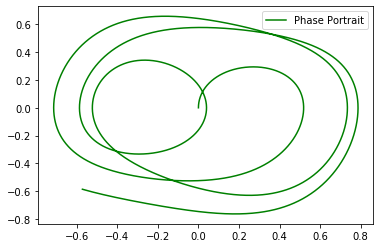

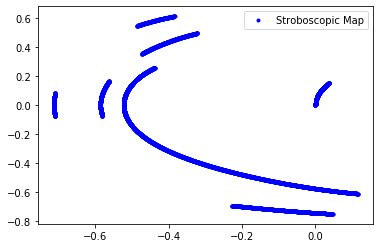

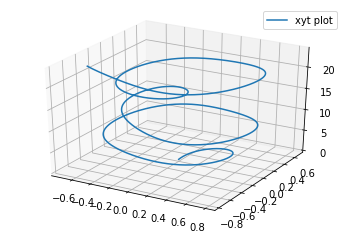

In [4]:
t_counter = []
x_counter = []
y_counter = []
x_n = x_init
x_n_plus_1 = (y_init)*(delta_t) + (x_init)
t_n = 0
for iter_count in range(24000):
    t_n = (iter_count)*(delta_t) ; t_counter.append(t_n)
    y_n = (x_n_plus_1 - x_n)/delta_t ; y_counter.append(y_n)
    x_counter.append(x_n)
    x_n_plus_2 = 2*(x_n_plus_1) - (x_n) + ((delta_t)**2)*(B*(np.cos(ñ*t_n)) - (x_n)**3) - (µ)*(delta_t)*(1 - gam*x_n*x_n)*((x_n_plus_1) - (x_n))
    x_n = x_n_plus_1
    x_n_plus_1 = x_n_plus_2

plt.plot(x_counter, y_counter,'g',label="Phase Portrait")
plt.legend(loc='best')

plt.figure()

y_2npi = []
x_2npi = []
t_2npi = []

for i in range(len(t_counter) - 1):
    if abs((y_counter[i+1]-y_counter[i])/delta_t - µ*(x_counter[i+1]-x_counter[i])*(1 - gam*x_counter[i]*x_counter[i])/delta_t + (x_counter[i])**3 - B) < 0.1:
        y_2npi.append(y_counter[i])
        x_2npi.append(x_counter[i])
        t_2npi.append(t_counter[i])
plt.plot(x_2npi, y_2npi,'b.', label="Stroboscopic Map")
plt.legend(loc='best')

plt.figure()

ax = plt.axes(projection='3d')

ax.plot3D(np.array(x_counter), np.array(y_counter), np.array(t_counter), label="xyt plot") 
plt.legend(loc='best')

Interactive plots

In [5]:
def plots(ñ):
    t_counter = []
    x_counter = []
    y_counter = []
    x_n = x_init
    x_n_plus_1 = (y_init)*(delta_t) + (x_init)
    t_n = 0
    for iter_count in range(24000):
        t_n = (iter_count)*(delta_t) ; t_counter.append(t_n)
        y_n = (x_n_plus_1 - x_n)/delta_t ; y_counter.append(y_n)
        x_counter.append(x_n)
        x_n_plus_2 = 2*(x_n_plus_1) - (x_n) + ((delta_t)**2)*(B*(np.cos(ñ*t_n)) - (x_n)**3) - (µ)*(delta_t)*(1 - gam*x_n*x_n)*((x_n_plus_1) - (x_n))
        x_n = x_n_plus_1
        x_n_plus_1 = x_n_plus_2

    plt.plot(x_counter, y_counter,'g',label="Phase Portrait")
    plt.legend(loc='best')
    
    plt.figure()
    
    y_2npi = []
    x_2npi = []
    t_2npi = []

    for i in range(len(t_counter) - 1):
        if abs((y_counter[i+1]-y_counter[i])/delta_t - µ*(x_counter[i+1]-x_counter[i])*(1 - gam*x_counter[i]*x_counter[i])/delta_t + (x_counter[i])**3 - B) < 0.1:
            y_2npi.append(y_counter[i])
            x_2npi.append(x_counter[i])
            t_2npi.append(t_counter[i])
    plt.plot(x_2npi, y_2npi,'b.', label="Stroboscopic Map")
    plt.legend(loc='best')
    
    plt.figure()

    ax = plt.axes(projection='3d')

    ax.plot3D(np.array(x_counter), np.array(y_counter), np.array(t_counter), label="xyt plot") 
    plt.legend(loc='best')

interact(plots, ñ=widgets.FloatSlider(min=1.01,max=1.02,step=0.001,value=1.015))

interactive(children=(FloatSlider(value=1.015, description='ñ', max=1.02, min=1.01, step=0.001), Output()), _d…

<function __main__.plots(ñ)>